## Premier League Football Analysis
### Andrew Lujan
### Regis University
### MSDS 696: Practicum 2



This final project will be my attempt to apply concepts learned throughout the Regis Data Science program. For the project, I decided on focusing on data science in Sport and turned my aim to analyze the English Premier League. The project will highlight my skills in:

* Exploratory Data Analysis
* Data Cleaning and Preparation
* Feature Engineering
* Data Visualization
* Modeling
* Machine Learning



### Research Problem

The English Premier League has become a competitive league with the influx of money from new ownership groups buying lower tier teams. This creates a need to spend money more wisely through the use of data and scouting. 

* Using data as a key driver, this project will use past data from previous seasons to build multiple models that will make predictions on matches for the 2020-2021 season. The types of models that will be built and measured are:

    * Logistic Regression
    * Support Vector Machine
    * Random Forest Classification

* Additional analysis of top teams will be conducted to gauge which attributes seem to be most important when building a championship-level team. 

### Research Questions

* What kind of match day data is important in predicting a winner of a match?
* What kind of players do champions usually have? (Age profile)


### Package Import

In [1]:
# Packages for Data Analysis, Cleaning, and Wrangling

import pandas as pd
import numpy as np
import random as rnd

from datetime import datetime as dt
import itertools

In [2]:
# Packages for Data Visualzation
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Arc
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
%matplotlib inline

import squarify

from __future__ import unicode_literals
import joypy

# Seaborn Viz
import seaborn as sns

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

from adjustText import adjust_text



### Data Import
Data was retrieved from: http://football-data.co.uk/englandm.php

I'll pull in data from a decade back just to get a fair amount of data for the models that I'll be building. 

In [3]:
# Reading in datasets

location = "/Users/drewsdesktop/Desktop/Data Science/Regis Classes/MSDS 696- Final Practicum/Datasets/"

prem_2011 = pd.read_csv(location + "11_12.csv")
prem_2012 = pd.read_csv(location + "12_13.csv")
prem_2013 = pd.read_csv(location + "13_14.csv")
prem_2014 = pd.read_csv(location + "14_15.csv")
prem_2015 = pd.read_csv(location + "15_16.csv")
prem_2016 = pd.read_csv(location + "16_17.csv")
prem_2017 = pd.read_csv(location + "17_18.csv")
prem_2018 = pd.read_csv(location + "18_19.csv")
prem_2019 = pd.read_csv(location + "19_20.csv")
prem_2020 = pd.read_csv(location + "20_21.csv")
prem_2021 = pd.read_csv(location + "21_22.csv")

In [4]:
prem_2017.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,13/05/2018,Newcastle,Chelsea,3,0,H,1,0,H,...,2.01,21,1.00,1.90,1.83,2.11,2.03,4.85,3.72,1.80
376,E0,13/05/2018,Southampton,Man City,0,1,A,0,0,D,...,2.49,20,1.25,2.01,1.95,1.97,1.91,6.32,4.78,1.51
377,E0,13/05/2018,Swansea,Stoke,1,2,A,1,2,A,...,2.06,19,-0.50,1.94,1.88,2.03,1.98,2.08,3.56,3.82
378,E0,13/05/2018,Tottenham,Leicester,5,4,H,1,2,A,...,2.84,20,-1.50,1.96,1.86,2.05,2.00,1.38,5.50,8.15
379,E0,13/05/2018,West Ham,Everton,3,1,H,1,0,H,...,1.97,21,-0.25,2.09,2.03,1.88,1.84,2.35,3.40,3.28


In [5]:
prem_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 71 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

#### Feature Selection
First of all, we want data that is related to the actual match. Additionally, we need to convert the date data into a datetime format. 

In [6]:
#Converting the Dates of each table into datetime format

prem_2011['Date'] = pd.to_datetime(prem_2011['Date'], format='%d/%m/%y')
prem_2012['Date'] = pd.to_datetime(prem_2012['Date'], format='%d/%m/%y')
prem_2013['Date'] = pd.to_datetime(prem_2013['Date'], format='%d/%m/%y')
prem_2014['Date'] = pd.to_datetime(prem_2014['Date'], format='%d/%m/%y')
prem_2015['Date'] = pd.to_datetime(prem_2015['Date'], format='%d/%m/%Y') # Different Date format
prem_2016['Date'] = pd.to_datetime(prem_2016['Date'], format='%d/%m/%y')
prem_2017['Date'] = pd.to_datetime(prem_2017['Date'], format='%d/%m/%Y')# Different Date format
prem_2018['Date'] = pd.to_datetime(prem_2018['Date'], format='%d/%m/%Y')# Different Date format
prem_2019['Date'] = pd.to_datetime(prem_2019['Date'], format='%d/%m/%Y')# Different Date format
prem_2020['Date'] = pd.to_datetime(prem_2020['Date'], format='%d/%m/%Y')# Different Date format
prem_2021['Date'] = pd.to_datetime(prem_2021['Date'], format='%d/%m/%Y')# Different Date format



#### Collecting relevant data (Gameplay data)

The next part of the data preparation process was to collect the features of the dataset that were only related to an actual match. 

A definition of the statistics will help viewers to better understand as we go forward. 

* **FTHG** = Full-time Home goals
* **FTAG** = Full-time Away goals
* **FTR** = Full-time Result

In [7]:
# Collect Gameplay statistics
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

game_stats1 = prem_2011[columns_req]                      
game_stats2 = prem_2012[columns_req]
game_stats3 = prem_2013[columns_req]
game_stats4 = prem_2014[columns_req]
game_stats5 = prem_2015[columns_req]
game_stats6 = prem_2016[columns_req]
game_stats7 = prem_2017[columns_req]
game_stats8 = prem_2018[columns_req]
game_stats9 = prem_2019[columns_req]
game_stats10 = prem_2020[columns_req]
game_stats11 = prem_2021[columns_req] 

In [8]:
game_stats8.tail(30)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
350,2019-04-26,Liverpool,Huddersfield,5,0,H
351,2019-04-27,Brighton,Newcastle,1,1,D
352,2019-04-27,Crystal Palace,Everton,0,0,D
353,2019-04-27,Fulham,Cardiff,1,0,H
354,2019-04-27,Southampton,Bournemouth,3,3,D
355,2019-04-27,Tottenham,West Ham,0,1,A
356,2019-04-27,Watford,Wolves,1,2,A
357,2019-04-28,Burnley,Man City,0,1,A
358,2019-04-28,Leicester,Arsenal,3,0,H
359,2019-04-28,Man United,Chelsea,1,1,D


It looks like I was successful in stripping the data from the larger dataset that was initially pulled in. 

#### Aggregating Goals Scored and Conceded

* Next, I want to aggregate the information important to matches. I'll do this by aggregating based on team and matchweek. I'll pass in the team name as a key and all of the information corresponding to the matching will append to that key. 

* The same process will be done for Goals conceded as well. 

In [9]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



In [10]:
# Get goals conceded by team and Matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as a key
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # Value that goes with the key is a list with the match location
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG'] 
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals conceded
    # Rows will represent teams and Columns will represent the matchweek
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

Next, I'll pass both of the functions created into a new function that will do all of that and aggregate the information into empty lists. Utilizing a for loop, the function will iterate collecting the stat information and appending it to the lists created below:
   * HTGS, ATGS, HTGC, ATGC

In [11]:
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


In [12]:
game_stats4.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
376,2015-05-24,Leicester,QPR,5.0,1.0,H
377,2015-05-24,Man City,Southampton,2.0,0.0,H
378,2015-05-24,Newcastle,West Ham,2.0,0.0,H
379,2015-05-24,Stoke,Liverpool,6.0,1.0,H
380,NaT,NaN,NaN,NaN,NaN,NaN


In [13]:
game_stats4 = game_stats4.drop(game_stats4.index[380])

In [14]:
game_stats4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      380 non-null    datetime64[ns]
 1   HomeTeam  380 non-null    object        
 2   AwayTeam  380 non-null    object        
 3   FTHG      380 non-null    float64       
 4   FTAG      380 non-null    float64       
 5   FTR       380 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 20.8+ KB


In [15]:
game_stats4.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
375,2015-05-24,Hull,Man United,0.0,0.0,D
376,2015-05-24,Leicester,QPR,5.0,1.0,H
377,2015-05-24,Man City,Southampton,2.0,0.0,H
378,2015-05-24,Newcastle,West Ham,2.0,0.0,H
379,2015-05-24,Stoke,Liverpool,6.0,1.0,H


#### Note

GameStats 4 for some reason kept producing a null value at number row number 380. To fix this I dropped the null value row so that the get_gss function could properly execute. Gamestats4 kept causing issues when applying that function in the cell below due to said null value. 

In [16]:
# Applying the function created to the datasets


game_stats1 = get_gss(game_stats1)
game_stats2 = get_gss(game_stats2)
game_stats3 = get_gss(game_stats3)
game_stats4 = get_gss(game_stats4)
game_stats5 = get_gss(game_stats5)
game_stats6 = get_gss(game_stats6)
game_stats7 = get_gss(game_stats7)
game_stats8 = get_gss(game_stats8)
game_stats9 = get_gss(game_stats9)
game_stats10 = get_gss(game_stats10)
#game_stats11 = get_gss(game_stats11)

In [17]:
game_stats10.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
375,2021-05-23,Liverpool,Crystal Palace,2,0,H,66,41,42,64
376,2021-05-23,Man City,Everton,5,0,H,78,47,32,43
377,2021-05-23,Sheffield United,Burnley,1,0,H,19,33,63,54
378,2021-05-23,West Ham,Southampton,3,0,H,59,47,47,65
379,2021-05-23,Wolves,Man United,1,2,A,35,71,50,43


#### Assigning points and matches to teams
* Next, we'll need to create some functions that take a a win result and 3 points to the dictionary for each team. 
* The same will be done for draws, but 1 point will be assigned to the team tally. 
* The final function takes in both the functions created to calculate points and matches and passes them into to create new features for the datasets.

In [18]:
# Getting points and accumulating them
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points

In [19]:
# Getting Matches and Aggregating points

def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [20]:
# Applying get aggregate points to each dataset

game_stats1 = get_agg_points(game_stats1)
game_stats2 = get_agg_points(game_stats2)
game_stats3 = get_agg_points(game_stats3)
game_stats4 = get_agg_points(game_stats4)
game_stats5 = get_agg_points(game_stats5)
game_stats6 = get_agg_points(game_stats6)
game_stats7 = get_agg_points(game_stats7)
game_stats8 = get_agg_points(game_stats8)
game_stats9 = get_agg_points(game_stats9)
game_stats10 = get_agg_points(game_stats10)

In [21]:
game_stats10.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
375,2021-05-23,Liverpool,Crystal Palace,2,0,H,66,41,42,64,66,44
376,2021-05-23,Man City,Everton,5,0,H,78,47,32,43,83,59
377,2021-05-23,Sheffield United,Burnley,1,0,H,19,33,63,54,20,39
378,2021-05-23,West Ham,Southampton,3,0,H,59,47,47,65,62,43
379,2021-05-23,Wolves,Man United,1,2,A,35,71,50,43,45,71


#### Getting Form
Form will tell how the previous matches of a team having gone. This will be collected through the first function below and aggregated using the add form function. 

In [22]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


In [23]:
def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    

In [24]:
# Applying to current data frames

game_stats1 = add_form_df(game_stats1)
game_stats2 = add_form_df(game_stats2)
game_stats3 = add_form_df(game_stats3)
game_stats4 = add_form_df(game_stats4)
game_stats5 = add_form_df(game_stats5)
game_stats6 = add_form_df(game_stats6)
game_stats7 = add_form_df(game_stats7)
game_stats8 = add_form_df(game_stats8)
game_stats9 = add_form_df(game_stats9)
game_stats10 = add_form_df(game_stats10)

In [25]:
game_stats10.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
370,2021-05-23,Arsenal,Brighton,2,0,H,53,40,39,44,...,W,W,W,D,W,L,W,W,L,L
371,2021-05-23,Aston Villa,Chelsea,2,1,H,53,57,45,34,...,W,W,L,L,D,W,L,W,W,W
372,2021-05-23,Fulham,Newcastle,0,2,A,27,44,51,62,...,D,W,L,L,L,W,L,L,D,D
373,2021-05-23,Leeds,West Brom,3,1,H,59,34,53,73,...,W,L,W,L,W,L,L,D,D,D
374,2021-05-23,Leicester,Tottenham,2,4,A,66,64,46,43,...,L,L,W,W,L,L,D,W,W,W
375,2021-05-23,Liverpool,Crystal Palace,2,0,H,66,41,42,64,...,W,L,W,W,W,L,W,W,D,L
376,2021-05-23,Man City,Everton,5,0,H,78,47,32,43,...,L,W,W,L,L,D,W,W,W,L
377,2021-05-23,Sheffield United,Burnley,1,0,H,19,33,63,54,...,L,L,W,L,L,W,L,L,W,W
378,2021-05-23,West Ham,Southampton,3,0,H,59,47,47,65,...,W,L,D,W,L,W,W,L,L,D
379,2021-05-23,Wolves,Man United,1,2,A,35,71,50,43,...,L,D,L,L,W,L,D,W,L,D


In [26]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

game_stats1 = game_stats1[cols]
game_stats2 = game_stats2[cols]
game_stats3 = game_stats3[cols]
game_stats4 = game_stats4[cols]
game_stats5 = game_stats5[cols]
game_stats6 = game_stats6[cols]
game_stats7 = game_stats7[cols]
game_stats8 = game_stats8[cols]
game_stats9 = game_stats9[cols]
game_stats10 = game_stats10[cols]

In [27]:
game_stats10.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5
375,2021-05-23,Liverpool,Crystal Palace,2,0,H,66,41,42,64,...,W,W,W,W,D,L,W,L,W,L
376,2021-05-23,Man City,Everton,5,0,H,78,47,32,43,...,L,W,L,W,W,W,L,D,W,L
377,2021-05-23,Sheffield United,Burnley,1,0,H,19,33,63,54,...,L,W,L,L,W,L,L,W,L,W
378,2021-05-23,West Ham,Southampton,3,0,H,59,47,47,65,...,W,D,L,W,L,L,W,W,L,D
379,2021-05-23,Wolves,Man United,1,2,A,35,71,50,43,...,L,L,W,D,L,D,L,L,W,D


In [28]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat


game_stats1 = get_mw(game_stats1)
game_stats2 = get_mw(game_stats2)
game_stats3 = get_mw(game_stats3)
game_stats4 = get_mw(game_stats4)
game_stats5 = get_mw(game_stats5)
game_stats6 = get_mw(game_stats6)
game_stats7 = get_mw(game_stats7)
game_stats8 = get_mw(game_stats8)
game_stats9 = get_mw(game_stats9)
game_stats10 = get_mw(game_stats10)

In [29]:
game_stats5.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
375,2016-05-15,Stoke,West Ham,2,1,H,39,64,54,49,...,D,L,L,L,W,L,W,W,D,38
376,2016-05-15,Swansea,Man City,1,1,D,41,70,51,40,...,W,L,L,W,D,L,W,D,W,38
377,2016-05-15,Watford,Sunderland,2,2,D,38,46,48,60,...,L,W,L,W,W,W,D,D,W,38
378,2016-05-15,West Brom,Liverpool,1,1,D,33,62,47,49,...,L,D,L,L,D,W,L,D,W,38
379,2016-05-17,Man United,Bournemouth,3,1,H,46,44,34,64,...,W,D,W,W,D,L,L,L,W,38


### Aggregating all of the information into one table. 

Next, I need to collect all of the statistical information that we've created and aggregate it into one table. 

In [30]:
game_stats = pd.concat([game_stats1,
                          game_stats2,
                          game_stats3,
                          game_stats4,
                          game_stats5,
                          game_stats6,
                          game_stats7,
                         game_stats8,
                          game_stats9,
                          game_stats10],
                           ignore_index=True)

In [31]:
game_stats.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
0,2011-08-13,Blackburn,Wolves,1.0,2.0,A,0.0,0.0,0.0,0.0,...,M,M,M,M,M,M,M,M,M,1
1,2011-08-13,Fulham,Aston Villa,0.0,0.0,D,0.0,0.0,0.0,0.0,...,M,M,M,M,M,M,M,M,M,1
2,2011-08-13,Liverpool,Sunderland,1.0,1.0,D,0.0,0.0,0.0,0.0,...,M,M,M,M,M,M,M,M,M,1
3,2011-08-13,Newcastle,Arsenal,0.0,0.0,D,0.0,0.0,0.0,0.0,...,M,M,M,M,M,M,M,M,M,1
4,2011-08-13,QPR,Bolton,0.0,4.0,A,0.0,0.0,0.0,0.0,...,M,M,M,M,M,M,M,M,M,1


#### Collecting Form Points

This following function will collect the form points and aggregate them in  new features called:
* HTFormPts, ATFormPts

In [32]:
# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

game_stats['HTFormPtsStr'] = game_stats['HM1'] + game_stats['HM2'] + game_stats['HM3'] + game_stats['HM4'] + game_stats['HM5']
game_stats['ATFormPtsStr'] = game_stats['AM1'] + game_stats['AM2'] + game_stats['AM3'] + game_stats['AM4'] + game_stats['AM5']

game_stats['HTFormPts'] = game_stats['HTFormPtsStr'].apply(get_form_points)
game_stats['ATFormPts'] = game_stats['ATFormPtsStr'].apply(get_form_points)

In [33]:
game_stats.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts
3795,2021-05-23,Liverpool,Crystal Palace,2.0,0.0,H,66.0,41.0,42.0,64.0,...,L,W,L,W,L,38,WWWWD,LWLWL,13,6
3796,2021-05-23,Man City,Everton,5.0,0.0,H,78.0,47.0,32.0,43.0,...,W,L,D,W,L,38,LWLWW,WLDWL,9,7
3797,2021-05-23,Sheffield United,Burnley,1.0,0.0,H,19.0,33.0,63.0,54.0,...,L,L,W,L,W,38,LWLLW,LLWLW,6,6
3798,2021-05-23,West Ham,Southampton,3.0,0.0,H,59.0,47.0,47.0,65.0,...,L,W,W,L,D,38,WDLWL,LWWLD,7,7
3799,2021-05-23,Wolves,Man United,1.0,2.0,A,35.0,71.0,50.0,43.0,...,D,L,L,W,D,38,LLWDL,DLLWD,4,5


#### ID Winning/Losing Streaks

The functions below will collect match result information and identify winning or losing streaks. 

In [34]:
# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [35]:
# Apply the functions above to the game_stats dataset

game_stats['HTWinStreak3'] = game_stats['HTFormPtsStr'].apply(get_3game_ws)
game_stats['HTWinStreak5'] = game_stats['HTFormPtsStr'].apply(get_5game_ws)
game_stats['HTLossStreak3'] = game_stats['HTFormPtsStr'].apply(get_3game_ls)
game_stats['HTLossStreak5'] = game_stats['HTFormPtsStr'].apply(get_5game_ls)

game_stats['ATWinStreak3'] = game_stats['ATFormPtsStr'].apply(get_3game_ws)
game_stats['ATWinStreak5'] = game_stats['ATFormPtsStr'].apply(get_5game_ws)
game_stats['ATLossStreak3'] = game_stats['ATFormPtsStr'].apply(get_3game_ls)
game_stats['ATLossStreak5'] = game_stats['ATFormPtsStr'].apply(get_5game_ls)

game_stats.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [36]:
game_stats.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5
3795,2021-05-23,Liverpool,Crystal Palace,2.0,0.0,H,66.0,41.0,42.0,64.0,...,13,6,0,0,0,0,0,0,0,0
3796,2021-05-23,Man City,Everton,5.0,0.0,H,78.0,47.0,32.0,43.0,...,9,7,0,0,0,0,0,0,0,0
3797,2021-05-23,Sheffield United,Burnley,1.0,0.0,H,19.0,33.0,63.0,54.0,...,6,6,0,0,0,0,0,0,0,0
3798,2021-05-23,West Ham,Southampton,3.0,0.0,H,59.0,47.0,47.0,65.0,...,7,7,0,0,0,0,0,0,0,0
3799,2021-05-23,Wolves,Man United,1.0,2.0,A,35.0,71.0,50.0,43.0,...,4,5,0,0,0,0,0,0,0,0


#### Get Goal Difference and Pt Differential

* Now, we'll do some feature engineering using the difference between goals scored and goals conceded for both the home and away teams. 

* The same will be done for the total points accumulated from the Home and Away teams as well. 

In [37]:
# Get Goal Difference
game_stats['HTGD'] = game_stats['HTGS'] - game_stats['HTGC']
game_stats['ATGD'] = game_stats['ATGS'] - game_stats['ATGC']

# Diff in points
game_stats['DiffPts'] = game_stats['HTP'] - game_stats['ATP']
game_stats['DiffFormPts'] = game_stats['HTFormPts'] - game_stats['ATFormPts']


In [38]:
game_stats.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
3795,2021-05-23,Liverpool,Crystal Palace,2.0,0.0,H,66.0,41.0,42.0,64.0,...,0,0,0,0,0,0,24.0,-23.0,22,7
3796,2021-05-23,Man City,Everton,5.0,0.0,H,78.0,47.0,32.0,43.0,...,0,0,0,0,0,0,46.0,4.0,24,2
3797,2021-05-23,Sheffield United,Burnley,1.0,0.0,H,19.0,33.0,63.0,54.0,...,0,0,0,0,0,0,-44.0,-21.0,-19,0
3798,2021-05-23,West Ham,Southampton,3.0,0.0,H,59.0,47.0,47.0,65.0,...,0,0,0,0,0,0,12.0,-18.0,19,0
3799,2021-05-23,Wolves,Man United,1.0,2.0,A,35.0,71.0,50.0,43.0,...,0,0,0,0,0,0,-15.0,28.0,-26,-1


#### Scale the goal difference and difference in pts by matchweek. 

In [39]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
game_stats.MW = game_stats.MW.astype(float)

for col in cols:
    game_stats[col] = game_stats[col] / game_stats.MW

In [40]:
game_stats.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
3795,2021-05-23,Liverpool,Crystal Palace,2.0,0.0,H,66.0,41.0,42.0,64.0,...,0,0,0,0,0,0,0.631579,-0.605263,0.578947,0.184211
3796,2021-05-23,Man City,Everton,5.0,0.0,H,78.0,47.0,32.0,43.0,...,0,0,0,0,0,0,1.210526,0.105263,0.631579,0.052632
3797,2021-05-23,Sheffield United,Burnley,1.0,0.0,H,19.0,33.0,63.0,54.0,...,0,0,0,0,0,0,-1.157895,-0.552632,-0.500000,0.000000
3798,2021-05-23,West Ham,Southampton,3.0,0.0,H,59.0,47.0,47.0,65.0,...,0,0,0,0,0,0,0.315789,-0.473684,0.500000,0.000000
3799,2021-05-23,Wolves,Man United,1.0,2.0,A,35.0,71.0,50.0,43.0,...,0,0,0,0,0,0,-0.394737,0.736842,-0.684211,-0.026316


### Final Touches

* Create the testing set for the 2020-2021 season **AND** 
* create a final_cleaned dataset to use for the analysis

In [41]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
game_stats['FTR'] = game_stats.FTR.apply(only_hw)

# Testing set (2020-2021 season)
game_stats_test = game_stats[3420:]

In [42]:
game_stats.to_csv(location + "final_dataset.csv")
game_stats_test.to_csv(location + "test.csv")

### EDA and Model-Building

Now that the data has been prepared, we are going to start doing some analysis. 

Predicting match outcomes: https://www.youtube.com/watch?v=6tQhoUuQrOw&t=745s

I'll be adapting the model to make predictions for the 2020-2021 season and will do further visualization based on the outcomes of predictions. 


#### Import Libraries


In [43]:
import pandas as pd
# Logistic is used when the response variable is categorical in nature
from sklearn.linear_model import LogisticRegression

# Random forest used in classification by using decision tree classifiers on subsamples of a dataset
from sklearn.ensemble import RandomForestClassifier

# Classificer that classifies through the use of a hyperplane
from sklearn.svm import SVC

# Normalization/Preprocessing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Data display
from IPython.display import display

In [44]:
game_stats.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,2011-08-13,Blackburn,Wolves,1.0,2.0,NH,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,2011-08-13,Fulham,Aston Villa,0.0,0.0,NH,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2011-08-13,Liverpool,Sunderland,1.0,1.0,NH,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,2011-08-13,Newcastle,Arsenal,0.0,0.0,NH,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,2011-08-13,QPR,Bolton,0.0,4.0,NH,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


#### Table information

* Full Time Result will be the response variable we are predicting on. H= Home Win, D= Draw, A = Away win.
* HTGD = Home team goal difference
* ATGD = Away team goal difference
* HTP = Home team points
* ATP = Away team points
* DiffFormPts = Difference in points

#### EDA

* Some things that we should try and figure out are the win rates for the home team
    * Will need to know total number of matches
    * Need to know matches one by the home team
    * Need to know number of features in the dataset

In [45]:
# Total number of matches.
n_matches = game_stats.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = game_stats.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(game_stats[game_stats.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 3800
Number of features: 38
Number of matches won by home team: 1702
Win rate of home team: 44.79%


It looks like the Home team wins the match 44.79% of the time. That's a high total considering there are 3 possible outcomes: A win, draw, or loss. 

array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATP'>,
     

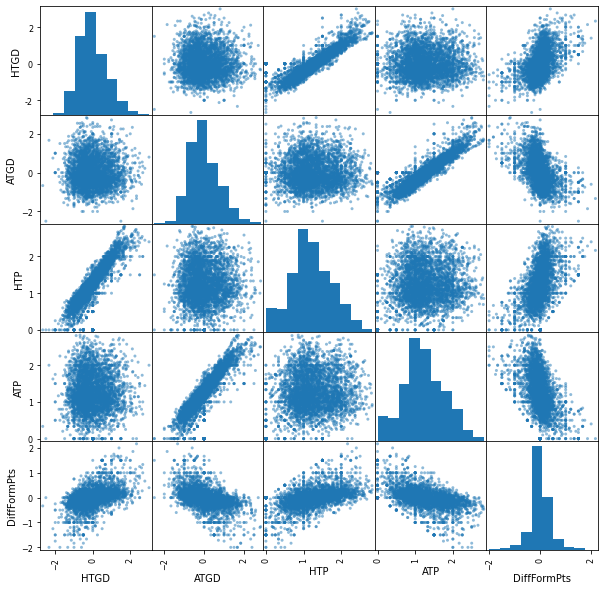

In [46]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

scatter_matrix(game_stats[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(10,10))

#### Interpreting the scatter matrix

The scatter matrix above allows us to to have a look and see how much some variables are affected by others. We can see that the home team goal differential and the away team goal differential are inversely related. As one goes down, the other goes up. This makes some sense as goal differential is the difference of goals scored between the opposing team, if one team's differential increases the opponents will decrease. 

#### Seaborn Correlation heatmap

Next, we'll explore the correlation between features by using a heatmap from seaborn. 

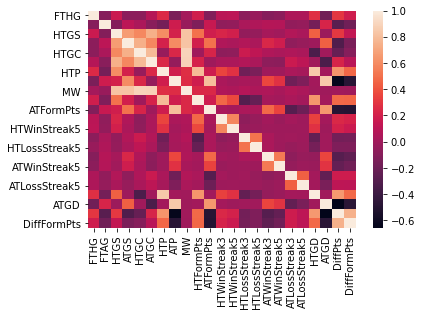

In [47]:
_ = sns.heatmap(game_stats.corr())

Within this, we can see that there aren't too many highly positively correlated features. There are few negatively correlated features and a lot of features with relatively low correlation. 

* I'm going to drop the following variables:
    * HTFormPtsStr
    * ATFormPtsStr


* These variables were used to generate the forms pts variabls and are just strings that no longer contribute much to the dataset. 

### Model Preparation

In [48]:
HT_Formstr = game_stats.pop('HTFormPtsStr')
AT_Formstr = game_stats.pop('ATFormPtsStr')

In [49]:
game_stats.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
3795,2021-05-23,Liverpool,Crystal Palace,2.0,0.0,H,66.0,41.0,42.0,64.0,...,0,0,0,0,0,0,0.631579,-0.605263,0.578947,0.184211
3796,2021-05-23,Man City,Everton,5.0,0.0,H,78.0,47.0,32.0,43.0,...,0,0,0,0,0,0,1.210526,0.105263,0.631579,0.052632
3797,2021-05-23,Sheffield United,Burnley,1.0,0.0,H,19.0,33.0,63.0,54.0,...,0,0,0,0,0,0,-1.157895,-0.552632,-0.500000,0.000000
3798,2021-05-23,West Ham,Southampton,3.0,0.0,H,59.0,47.0,47.0,65.0,...,0,0,0,0,0,0,0.315789,-0.473684,0.500000,0.000000
3799,2021-05-23,Wolves,Man United,1.0,2.0,NH,35.0,71.0,50.0,43.0,...,0,0,0,0,0,0,-0.394737,0.736842,-0.684211,-0.026316


### Addtional variable removal

Additonal variables that were removed from the dataset were the team names, dates, form streak after 3 games, and the actual scores of the game as those would give the models near perfect accuracy scores. 

In [50]:
Home_Team = game_stats.pop('HomeTeam')
Away_Team = game_stats.pop('AwayTeam')
Date = game_stats.pop('Date')
HM4 = game_stats.pop('HM4')
HM5 = game_stats.pop('HM5')
AM4 = game_stats.pop('AM4')
AM5 = game_stats.pop('AM5')

# Take away actual results
FTHG = game_stats.pop('FTHG')
FTAG = game_stats.pop('FTAG')
HTGS = game_stats.pop('HTGS')
HTGC = game_stats.pop('HTGC')
ATGS = game_stats.pop('ATGS')
ATGC = game_stats.pop('ATGC')

# Take out low impact metrics
HTWinStreak3 = game_stats.pop('HTWinStreak3')
HTWinStreak5 = game_stats.pop('HTWinStreak5')
HTLossStreak3 = game_stats.pop('HTLossStreak3')
HTLossStreak5 = game_stats.pop('HTLossStreak5')
ATWinStreak3 = game_stats.pop('ATWinStreak3')
ATWinStreak5 = game_stats.pop('ATWinStreak5')
ATLossStreak3 = game_stats.pop('ATLossStreak3')
ATLossStreak5 = game_stats.pop('ATLossStreak5')
HTFormPts = game_stats.pop('HTFormPts')
ATFormPts = game_stats.pop('ATFormPts')
MW = game_stats.pop('MW')

In [51]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FTR          3800 non-null   object 
 1   HTP          3800 non-null   float64
 2   ATP          3800 non-null   float64
 3   HM1          3800 non-null   object 
 4   HM2          3800 non-null   object 
 5   HM3          3800 non-null   object 
 6   AM1          3800 non-null   object 
 7   AM2          3800 non-null   object 
 8   AM3          3800 non-null   object 
 9   HTGD         3800 non-null   float64
 10  ATGD         3800 non-null   float64
 11  DiffPts      3800 non-null   float64
 12  DiffFormPts  3800 non-null   float64
dtypes: float64(6), object(7)
memory usage: 386.1+ KB


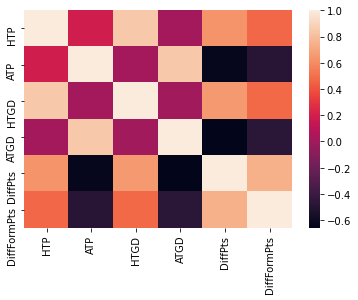

In [52]:
_ = sns.heatmap(game_stats.corr())

### Adjusted Heat Map interpretation

* From the heatmap above we can see that the metrics most valuable to FTR the result of the match (0 index) were:

* DiffPts- difference in league points between teams. An indication of their standing
* DiffFormPts- difference in the previous form from the past 3 matches. 
* HTGD- the goal differential of the home team
* HTP - the total number of points for the home team. 

In [53]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = game_stats.drop(['FTR'],1)
y_all = game_stats['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [54]:
X_all.tail()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffPts,DiffFormPts
3795,0.933978,-0.122756,W,W,W,L,W,L,0.853121,-0.822411,0.578947,0.184211
3796,1.739399,0.584628,L,W,L,W,L,D,1.627784,0.131655,0.631579,0.052632
3797,-1.245395,-0.358551,L,W,L,L,L,W,-1.541294,-0.751739,-0.500000,0.000000
3798,0.744468,-0.169915,W,D,L,L,W,W,0.430577,-0.645732,0.500000,0.000000
3799,-0.060953,1.150535,L,L,W,D,L,L,-0.520147,0.979713,-0.684211,-0.026316


#### List last 3 wins for each team

In [55]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

In [56]:
X_all.tail()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffPts,DiffFormPts
3795,0.933978,-0.122756,W,W,W,L,W,L,0.853121,-0.822411,0.578947,0.184211
3796,1.739399,0.584628,L,W,L,W,L,D,1.627784,0.131655,0.631579,0.052632
3797,-1.245395,-0.358551,L,W,L,L,L,W,-1.541294,-0.751739,-0.500000,0.000000
3798,0.744468,-0.169915,W,D,L,L,W,W,0.430577,-0.645732,0.500000,0.000000
3799,-0.060953,1.150535,L,L,W,D,L,L,-0.520147,0.979713,-0.684211,-0.026316


#### Feature correction

Machine-learning models require that variables are in interger form. Essentially, we need to remove any categorical variables and convert them into dummy or integers. 

In [57]:
def preprocess_features(X):
    
    # Creates new output dataframe
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']


In [58]:
X_all.tail()

,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,...,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffPts,DiffFormPts
3795,0.933978,-0.122756,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0.853121,-0.822411,0.578947,0.184211
3796,1.739399,0.584628,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1.627784,0.131655,0.631579,0.052632
3797,-1.245395,-0.358551,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,-1.541294,-0.751739,-0.500000,0.000000
3798,0.744468,-0.169915,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0.430577,-0.645732,0.500000,0.000000
3799,-0.060953,1.150535,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,-0.520147,0.979713,-0.684211,-0.026316


In [59]:
HM1_M = X_all.pop('HM1_M')
HM2_M = X_all.pop('HM2_M')
HM3_M = X_all.pop('HM3_M')
AM1_M = X_all.pop('AM1_M')
AM2_M = X_all.pop('AM2_M')
AM3_M = X_all.pop('AM3_M')

In [60]:
scaler.fit(X_all)

X_scaled_array = scaler.transform(X_all)

X_all_scaled = pd.DataFrame(X_scaled_array, columns = X_all.columns)

X_all_scaled.tail()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffPts,DiffFormPts
3795,0.933978,-0.122756,-0.553841,-0.824578,1.411427,-0.533935,-0.735498,1.292445,-0.554652,-0.725753,...,-0.558708,-0.760311,1.383514,-0.522524,1.372281,-0.749572,0.853121,-0.822411,0.832117,0.466207
3796,1.739399,0.584628,-0.553841,1.212741,-0.708503,-0.533935,-0.735498,1.292445,-0.554652,1.377879,...,-0.558708,1.315251,-0.722797,1.913786,-0.728714,-0.749572,1.627784,0.131655,0.906691,0.148326
3797,-1.245395,-0.358551,-0.553841,1.212741,-0.708503,-0.533935,-0.735498,1.292445,-0.554652,1.377879,...,-0.558708,1.315251,-0.722797,-0.522524,-0.728714,1.334095,-1.541294,-0.751739,-0.696653,0.021173
3798,0.744468,-0.169915,-0.553841,-0.824578,1.411427,1.872888,-0.735498,-0.773727,-0.554652,1.377879,...,-0.558708,-0.760311,1.383514,-0.522524,-0.728714,1.334095,0.430577,-0.645732,0.720256,0.021173
3799,-0.060953,1.150535,-0.553841,1.212741,-0.708503,-0.533935,1.359623,-0.773727,-0.554652,-0.725753,...,-0.558708,1.315251,-0.722797,-0.522524,1.372281,-0.749572,-0.520147,0.979713,-0.957663,-0.042403


In [61]:
X_all_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HTP          3800 non-null   float64
 1   ATP          3800 non-null   float64
 2   HM1_D        3800 non-null   float64
 3   HM1_L        3800 non-null   float64
 4   HM1_W        3800 non-null   float64
 5   HM2_D        3800 non-null   float64
 6   HM2_L        3800 non-null   float64
 7   HM2_W        3800 non-null   float64
 8   HM3_D        3800 non-null   float64
 9   HM3_L        3800 non-null   float64
 10  HM3_W        3800 non-null   float64
 11  AM1_D        3800 non-null   float64
 12  AM1_L        3800 non-null   float64
 13  AM1_W        3800 non-null   float64
 14  AM2_D        3800 non-null   float64
 15  AM2_L        3800 non-null   float64
 16  AM2_W        3800 non-null   float64
 17  AM3_D        3800 non-null   float64
 18  AM3_L        3800 non-null   float64
 19  AM3_W 

In [62]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all_scaled.head())


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffPts,DiffFormPts
0,-2.192948,-2.19775,-0.553841,-0.824578,-0.708503,-0.533935,-0.735498,-0.773727,-0.554652,-0.725753,...,-0.558708,-0.760311,-0.722797,-0.522524,-0.728714,-0.749572,0.008033,-0.009688,0.011801,0.021173
1,-2.192948,-2.19775,-0.553841,-0.824578,-0.708503,-0.533935,-0.735498,-0.773727,-0.554652,-0.725753,...,-0.558708,-0.760311,-0.722797,-0.522524,-0.728714,-0.749572,0.008033,-0.009688,0.011801,0.021173
2,-2.192948,-2.19775,-0.553841,-0.824578,-0.708503,-0.533935,-0.735498,-0.773727,-0.554652,-0.725753,...,-0.558708,-0.760311,-0.722797,-0.522524,-0.728714,-0.749572,0.008033,-0.009688,0.011801,0.021173
3,-2.192948,-2.19775,-0.553841,-0.824578,-0.708503,-0.533935,-0.735498,-0.773727,-0.554652,-0.725753,...,-0.558708,-0.760311,-0.722797,-0.522524,-0.728714,-0.749572,0.008033,-0.009688,0.011801,0.021173
4,-2.192948,-2.19775,-0.553841,-0.824578,-0.708503,-0.533935,-0.735498,-0.773727,-0.554652,-0.725753,...,-0.558708,-0.760311,-0.722797,-0.522524,-0.728714,-0.749572,0.008033,-0.009688,0.011801,0.021173


In [63]:
X_all_scaled.tail()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffPts,DiffFormPts
3795,0.933978,-0.122756,-0.553841,-0.824578,1.411427,-0.533935,-0.735498,1.292445,-0.554652,-0.725753,...,-0.558708,-0.760311,1.383514,-0.522524,1.372281,-0.749572,0.853121,-0.822411,0.832117,0.466207
3796,1.739399,0.584628,-0.553841,1.212741,-0.708503,-0.533935,-0.735498,1.292445,-0.554652,1.377879,...,-0.558708,1.315251,-0.722797,1.913786,-0.728714,-0.749572,1.627784,0.131655,0.906691,0.148326
3797,-1.245395,-0.358551,-0.553841,1.212741,-0.708503,-0.533935,-0.735498,1.292445,-0.554652,1.377879,...,-0.558708,1.315251,-0.722797,-0.522524,-0.728714,1.334095,-1.541294,-0.751739,-0.696653,0.021173
3798,0.744468,-0.169915,-0.553841,-0.824578,1.411427,1.872888,-0.735498,-0.773727,-0.554652,1.377879,...,-0.558708,-0.760311,1.383514,-0.522524,-0.728714,1.334095,0.430577,-0.645732,0.720256,0.021173
3799,-0.060953,1.150535,-0.553841,1.212741,-0.708503,-0.533935,1.359623,-0.773727,-0.554652,-0.725753,...,-0.558708,1.315251,-0.722797,-0.522524,1.372281,-0.749572,-0.520147,0.979713,-0.957663,-0.042403


#### Split the dataset
Next, I'll need to split the dataset up into training and test splits. 

In [64]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, 
                                                    test_size = 250,
                                                    random_state = 2,
                                                    stratify = y_all)

### Model Training/Evaluation
For evaluating the models, I'll be uing the time application to measure the time it takes to train a model. 

* Additionally, the f1 score will be used to measure the accuracy of the models. This type of score is valuable in the use of binary classification. Binary classification is when we are trying to predict one of two outcomes which is the case here. We are looking to predict whether or not a team wins or loses so the f1 score seems to be a good fit. 

* The second function makes predictions using the a classifier based on the earlier f1 score. 

* The 3rd function prints out the results of predictions for both the testing and training datasets. 

In [65]:
#for measuring training time
from time import time 

from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [66]:
# Initialize Logistic Regression
clf_A = LogisticRegression(random_state = 42)

#Initialize SVM
clf_B = SVC(random_state = 912, kernel='rbf')

#Initalize Random Forest
clf_C = RandomForestClassifier(random_state = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

Training a LogisticRegression using a training set size of 3550. . .
Trained model in 0.0214 seconds
Made predictions in 0.0013 seconds.
0.5865650969529086 0.663661971830986
F1 score and accuracy score for training set: 0.5866 , 0.6637.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.6075 , 0.6640.

Training a SVC using a training set size of 3550. . .
Trained model in 0.7069 seconds
Made predictions in 0.9780 seconds.
0.6254965691585409 0.7078873239436619
F1 score and accuracy score for training set: 0.6255 , 0.7079.
Made predictions in 0.0691 seconds.
F1 score and accuracy score for test set: 0.5427 , 0.6360.

Training a RandomForestClassifier using a training set size of 3550. . .
Trained model in 0.3312 seconds
Made predictions in 0.0452 seconds.
0.9818875119161106 0.983943661971831
F1 score and accuracy score for training set: 0.9819 , 0.9839.
Made predictions in 0.0099 seconds.
F1 score and accuracy score for test set: 0.5943 , 0.6560.



### Interpreting Model Results

The results of the models are listed below:

* Logistic Regression
    * The logistic regression model built had an F1 score of .6075 and an accuracy score of .6640.
    
* Support Vector Machine
    * The support vector machine model built had an f1 score of .5427 and an accuracy score of .6360. 
    
* Random Forest
    * The random forest model built had an f1 score of .5943 and an accuracy score of .6560. 


### Classification reports

* Metrics To Evaluate Machine Learning Algorithms in Python- https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

* Based on the results above it looks like the Logistic Regression model performed the best overall. However, I want to have one more look with a different report. I'll be using the classification report to further gauge the performance of the models. 

In [67]:
from sklearn.metrics import classification_report

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           H       0.64      0.58      0.61       112
          NH       0.68      0.73      0.71       138

    accuracy                           0.66       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.66      0.66      0.66       250



### Logistic Regression Classification Report

* Looking at the model performance for precision it looks as though the model's precisio is similar for both classifications Home team winning denoted by (H) and the home team not winning denoted (NH). The false positive rate for the model in both instances is .36 for H and .32 for NH. 

* Recall- The ratio of correctly predicted positive observations versus total number of positive observations is .58 for H and it was more accurate with a higher recall for NH.

* F1- The f1 score takes in the weight average of the previous two metrics. In our case H has an f1 score of .61 while NH has a better f1 score of .71. This is interesting to me because we seemed to have more evidence that suggested home teams were more likely to win, I thought the data might reflect a higher confidence in predicting the home team winning. 

In [68]:
model = SVC(random_state = 912, kernel='rbf')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           H       0.62      0.48      0.54       112
          NH       0.64      0.76      0.70       138

    accuracy                           0.64       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.63      0.64      0.63       250



### Support Vector Machine Classification Report

* Precision- The precision had similar results between the two classes as last time, but the difference between the two was a bit smaller at only .2. Again, the model had a higher precision and lower false positive rate when classifying the NH class. 

* Recall - The recall score for the H class in comparison to the logistic regression model was lower. This indicates that the support vector machine model had a difficult time correctly predicting positive observations for that class. 

* F1 score- The f1 score for the H class was lower in comparison to the logistic regression model. The same was true foor the NH class, however the NH class still had an f1 score of .70 which isn't bad. 

In [69]:
model = RandomForestClassifier(random_state = 82)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           H       0.63      0.56      0.59       112
          NH       0.67      0.73      0.70       138

    accuracy                           0.66       250
   macro avg       0.65      0.65      0.65       250
weighted avg       0.65      0.66      0.65       250



### Support Vector Machine Classification Report

* Precision- The random forest classifier split the difference between the stronger logistic regression model and the weaker support vector machine model. It had a slightly higher score for precision for the H class and was slightly higher in predicting the NH class. Again, the model had a lower false positive rate for the NH class. 

* Recall - The recall score for the H class was improved over the support vector machine model. This indicates that the model correctly predicted .56 of all actual positive results for the H class and .73 of results for the NH class. 

* F1 score- The f1 scores for the class were .59 for the H class and a respectable .70 for the NH class. 

### Logistic Regression Wins

Overall, it looks like the Logistic regression model slightly outperforms the random forest model which means that this would be the one I would work with going forward.

#### Improving Model Performance?

* Tune Hyperparameters for Classification Machine Learning Algorithms- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

* Next, we'll have a look at how to use gridsearch to find the best way to tune the logistic regression model.


In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.659249 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.658404 (0.018485) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.658404 (0.018485) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.658404 (0.018485) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.658404 (0.018485) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.658404 (0.018485) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.658404 (0.018485) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.658685 (0.018329) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.658779 (0.018396) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.658967 (0.018442) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.658310 (0.019010) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.658216 (0.019054) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.659249 (0.019056) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.656901 (0.020240) wit

### Results

Hm, it doesn't really look like the model improves a whole lot based on the results. Adding more data points could probably improve the accuracy of the model. However, I had to remove quite a few of the data points because they made it so the model was almost 100% accurate or very inaccurate.

* Metrics that seems to be of particular value to building the model were the goal differential metrics, league positions, and form points. Those metrics tell us how a team performs overall in terms of allowing goals and scoring goals. They are a good indicator of a team's quality. In our heatmap before they had higher correlation than the form metrics to the match result. 

## Team Evaluation

* The next part of the project will be our evaluation of the top 6 teams in the English Premier League historically. My rationale for this approach is below

### Big 6 Age Profile

First, I'll conduct an age profile on the squads of the Big 6 in the Premier League. The Big 6 of the Premier League are the following teams: Arsenal, Chelsea, Liverpool, Manchester City, Manchester United, and Tottenham. The reason I'm doing an age profile of these squads is because of last 25 champions of the premier league, only once has a team outside of the Big 6 won the premier league title. Leicester City in 2015-2016. So profiling the Big 6 and the ages of the players on those teams might give some insight on how to build a championship-caliber team.

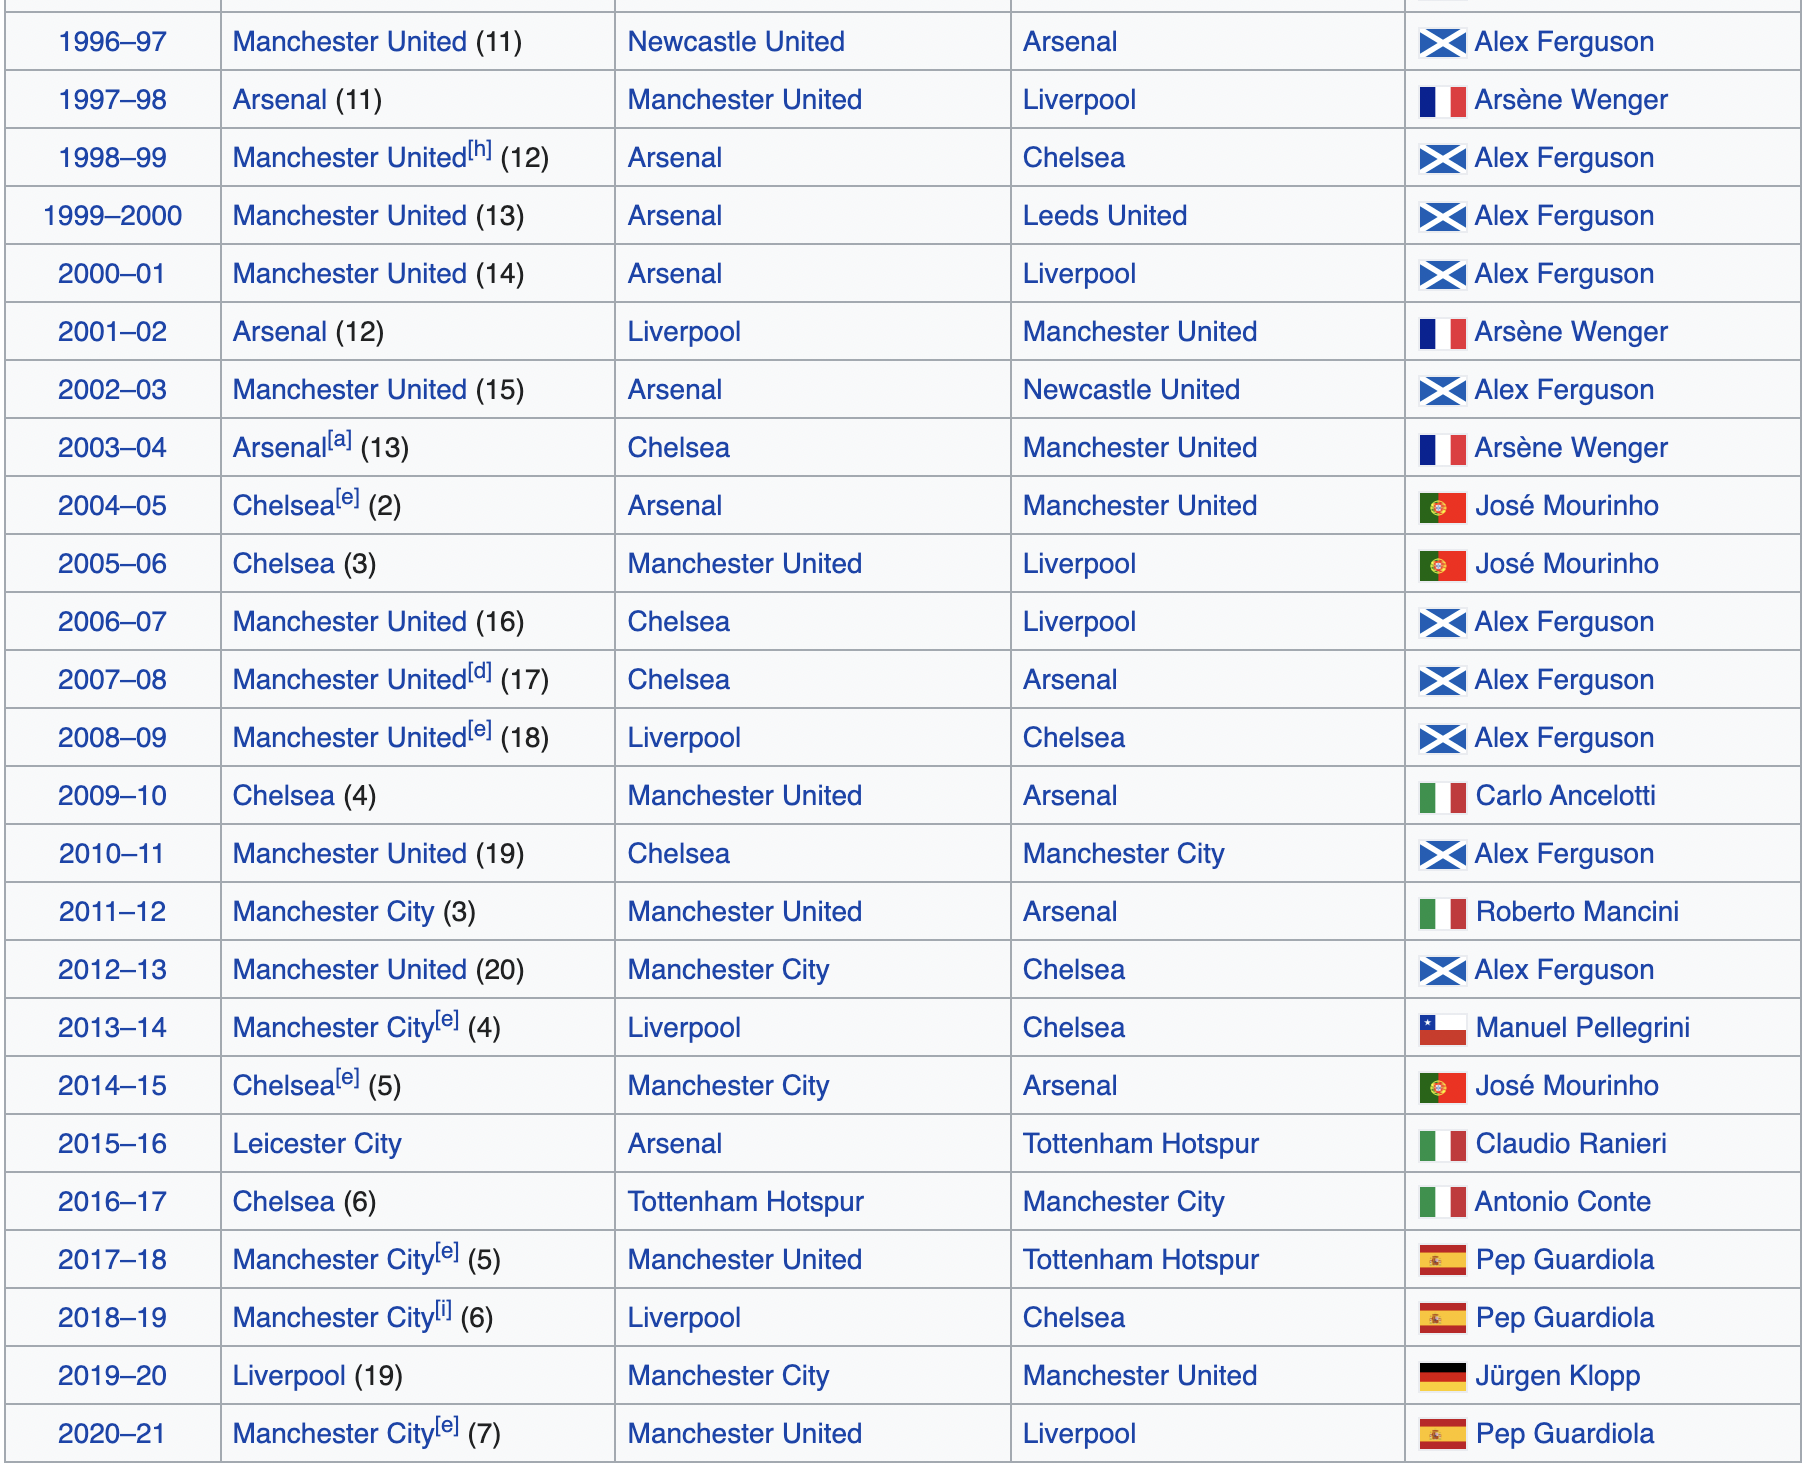

For the age profile, I'll be using data from the 2020-2021 season. Scatterplots will be generated from the following tutorial https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html.

The tutorial pits age against minutes share over the course of a 38 game Premier League season. 


Image source: https://en.wikipedia.org/wiki/List_of_English_football_champions

### Import Data

The source of the data that this project will be created with is FB Ref, found at the following link: https://fbref.com/en/

### Arsenal

In [71]:
# Creating a dataframe from html data on FBref
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html
# Arsenal Data
Arsenal = pd.read_html("https://fbref.com/en/squads/18bb7c10/2020-2021/Arsenal-Stats", header=1)[0]
Arsenal["Min_pct"] = 100*Arsenal["90s"]/38 ##number of matches in Premier League Season
Arsenal = Arsenal.dropna(subset=["Age", "Min_pct"])
Arsenal = Arsenal.loc[:len(Arsenal)-1, :]
Arsenal[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Bernd Leno,GK,28.0,91.578947
1,Bukayo Saka,"FW,DF",18.0,74.736842
2,Granit Xhaka,"MF,DF",27.0,73.684211
3,Rob Holding,DF,24.0,74.736842
4,Pierre-Emerick Aubameyang,FW,31.0,68.157895


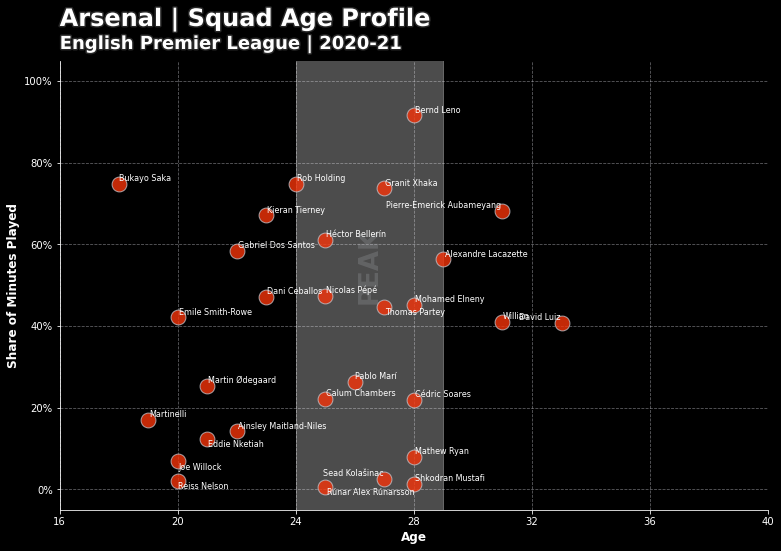

In [72]:
# Arsenal Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html

line_color = "#C1C2C9"
marker_color = "#F5340A"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(Arsenal["Age"], Arsenal["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#FEFEFF',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in Arsenal.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Arsenal | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("Arsenal-squad-age-profile", dpi=180)  

#### Arsenal Age Profile Analysis

* Looking at the age profile above, what sticks out is that Arsenal seem to have a balanced age profile overall. 
* In the peak area or prime years section that is shaded grey, Arsenal have a fair amount(15) of players that are in their peak years of skill. 
* However, Arsenal had an underwhelming year finishing at a league position of 8th. This could be due to the large amount of youth in the team, we'll explore further later on. 

### Chelsea


In [73]:
# Chelsea Data
Chelsea = pd.read_html("https://fbref.com/en/squads/cff3d9bb/2020-2021/Chelsea-Stats", header=1)[0]
Chelsea["Min_pct"] = 100*Chelsea["90s"]/38 ##number of matches in a Serie A season
Chelsea = Chelsea.dropna(subset=["Age", "Min_pct"])
Chelsea = Chelsea.loc[:len(Chelsea)-1, :]
Chelsea[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Mason Mount,"MF,FW",21.0,84.473684
1,Edouard Mendy,GK,28.0,80.263158
2,Timo Werner,FW,24.0,76.052632
3,Ben Chilwell,DF,23.0,66.842105
4,Reece James,DF,20.0,69.473684


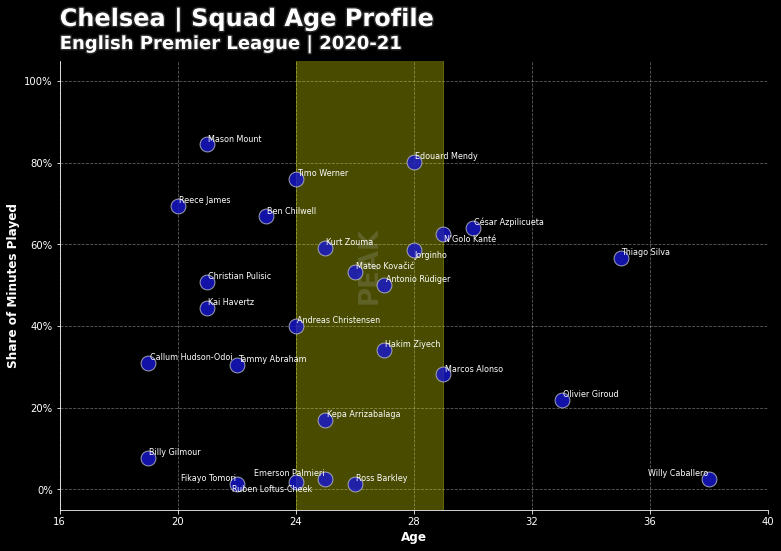

In [74]:
# Chelsea Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html


line_color = "#C1C2C9"
marker_color = "#1717D1"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(Chelsea["Age"], Chelsea["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#F1FB00',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in Chelsea.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Chelsea | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("Chelsea-squad-age-profile", dpi=180)  

#### Chelsea Age Profile Analysis

* Chelsea FC are a team that have won the league quite frequently in the past 25 years. However, last year was a year of transition. 
* Chelsea spent heavily in the transfer market on youth which explains why they have so many players outside of the peak age range that contributed high shares of minutes played. 
* Chelsea's age profile is similar to Arsenal's however, it seems that Chelsea's younger players are contributing more to their league efforts with higher shares of minutes played. Chelsea's final league position in 2020-2021 was 4th. 

#### Liverpool

In [75]:
#Liverpool Team Data

Liverpool = pd.read_html("https://fbref.com/en/squads/822bd0ba/2020-2021/Liverpool-Stats", header=1)[0]
Liverpool["Min_pct"] = 100*Liverpool["90s"]/38 ##number of matches in a Serie A season
Liverpool = Liverpool.dropna(subset=["Age", "Min_pct"])
Liverpool = Liverpool.loc[:len(Liverpool)-1, :]
Liverpool[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Andrew Robertson,DF,26.0,98.947368
1,Mohamed Salah,FW,28.0,90.000000
2,Trent Alexander-Arnold,DF,21.0,88.684211
3,Georginio Wijnaldum,MF,29.0,86.052632
4,Alisson,GK,27.0,86.842105


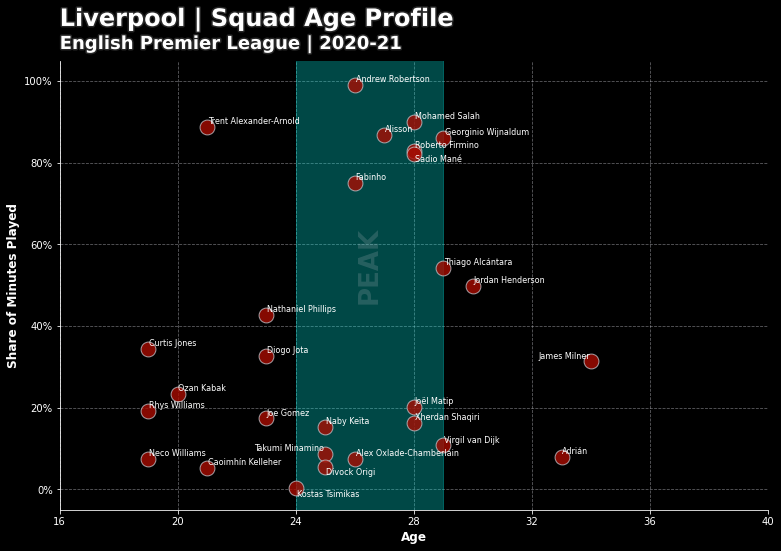

In [76]:
# Liverpool Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html


line_color = "#C1C2C9"
marker_color = "#A80C02"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(Liverpool["Age"], Liverpool["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#00F1EA',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in Liverpool.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Liverpool | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("Liverpool-squad-age-profile", dpi=180)  

#### Liverpool Age Profile Analysis 

* Liverpool won the league in the 2019-2020 season. Last year they finished 3rd. The age Profile of their team borders on older players and they seem to have a less bloated squad in comparison to Arsenal and Chelsea. 
* Liverpool had 16 players in the peak age strip that ranged from 24 years old to 29 years old.
* Most important to note is that the players in the peak age strip contribute high values for shares of minutes played indicating that they have quality players that are in the prime years of their careers. 


#### Manchester City

In [77]:
# Manchester City Team Data

City = pd.read_html("https://fbref.com/en/squads/b8fd03ef/2020-2021/Manchester-City-Stats", header=1)[0]
City["Min_pct"] = 100*City["90s"]/38 ##number of matches in a Serie A season
City = City.dropna(subset=["Age", "Min_pct"])
City = City.loc[:len(City)-1, :]
City[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Ederson,GK,26.0,94.736842
1,Rúben Dias,DF,23.0,83.157895
2,Rodri,MF,24.0,80.263158
3,Raheem Sterling,FW,25.0,74.210526
4,João Cancelo,DF,26.0,67.105263


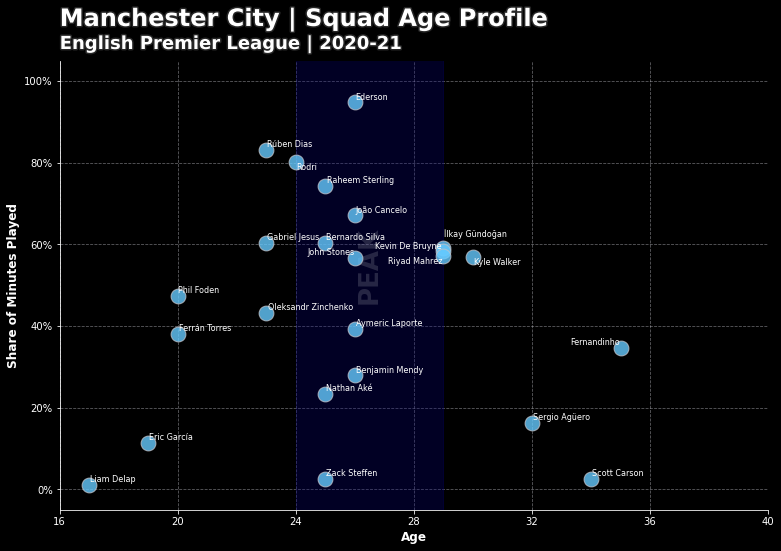

In [78]:
# Manchester City Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html


line_color = "#C1C2C9"
marker_color = "#66CAFF"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(City["Age"], City["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#040079',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in City.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Manchester City | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("City-squad-age-profile", dpi=180)  

#### Manchester City Age Profile Analysis
* The first thing noticeable about the Manchester City Squad profile is that the majority of the squad are in their prime years of their career or are extremely experienced. 
* Additionally, the players in their peak years contribute high percentages of minutes played. 
* Manchester City were the Champions of the 2020-2021 season which in itself tells how strong the team was. City have a strong blend of players in their primes mixed with senior players with lots of experience and some youth to round out the roster. 

#### Manchester United

In [79]:
# Manchester United Team Data

United = pd.read_html("https://fbref.com/en/squads/19538871/2020-2021/Manchester-United-Stats", header = 1)[0]
United["Min_pct"] = 100*United["90s"]/38 #Number of matches in Premier League Season
United = United.dropna(subset=["Age", "Min_pct"])
United = United.loc[:len(United)-1, :]
United[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Bruno Fernandes,MF,25.0,90.526316
1,Aaron Wan-Bissaka,DF,22.0,89.473684
2,Harry Maguire,DF,27.0,89.210526
3,Marcus Rashford,FW,22.0,85.263158
4,Luke Shaw,DF,25.0,77.631579


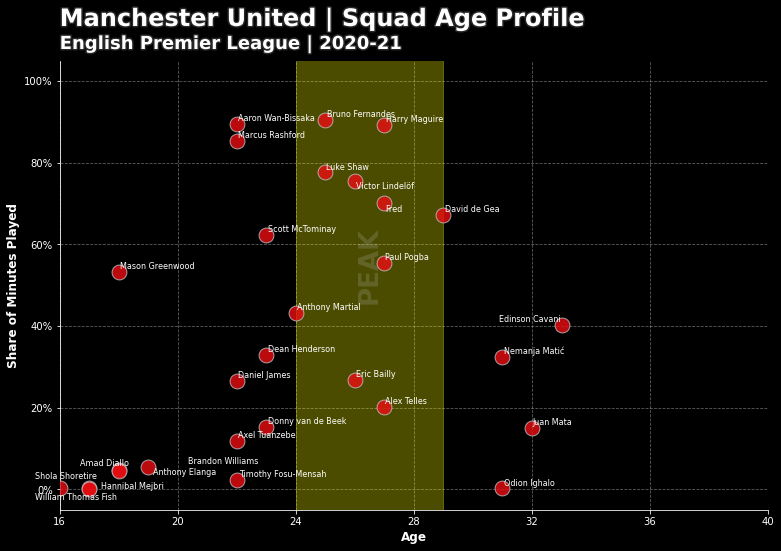

In [80]:
# Manchester United Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html


line_color = "#C1C2C9"
marker_color = "#EA0D11"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(United["Age"], United["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#FEFF00',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in United.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Manchester United | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("United-squad-age-profile", dpi=180)  

#### Manchester United Age Profile Analysis

* Manchester United have a bloated squad in comparison the champions Manchester City. Their squad make-up in comparison to City is a squad built around youth. 
* Valuable contributors to the team are mostly players in their peak years, but Aaron Wan-Bissaka and Marcus Rashford are both players that seem to add a lot of value to United's efforts. 
* Manchester United finished the season in second place which indicates that they have youth players with a lot of quality. We'll explore this later. 

#### Tottenham Hotspur

In [81]:
# Tottenham Hotspur Team Data

Spurs = pd.read_html("https://fbref.com/en/squads/361ca564/2020-2021/Tottenham-Hotspur-Stats", header = 1)[0]
Spurs["Min_pct"] = 100*Spurs["90s"]/38 #Number of matches in Premier League Season
Spurs = Spurs.dropna(subset=["Age", "Min_pct"])
Spurs = Spurs.loc[:len(Spurs)-1, :]
Spurs[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,Pierre Højbjerg,MF,24.0,100.000000
1,Hugo Lloris,GK,33.0,100.000000
2,Son Heung-min,FW,28.0,91.052632
3,Harry Kane,FW,27.0,90.000000
4,Eric Dier,DF,26.0,73.684211


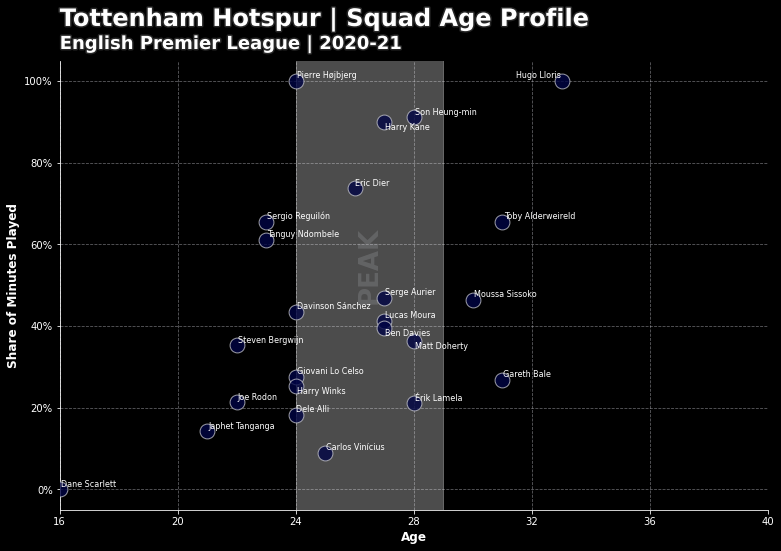

In [82]:
# Tottenham Hotspur Age Profile
# Minutes share X Age
# Code snippet adapted from https://sharmaabhishekk.github.io/mpl-footy/main/2021/08/09/squad-age-profile.html


line_color = "#C1C2C9"
marker_color = "#000444"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'DejaVu Sans' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(Spurs["Age"], Spurs["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='#FFFFFF',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in Spurs.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=8, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(-5, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=12, fontweight='bold')
    ax.yaxis.label.set(fontsize=12, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Tottenham Hotspur | Squad Age Profile", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="English Premier League | 2020-21", ha='left', 
            fontsize=18, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("Spurs-squad-age-profile", dpi=180)  

#### Tottenham Hotspur Age Profile Analysis

* Tottenham have a medium-sized squad with the majority of their players landing within their prime years of their careers. 
* Something noticeable about the squad is that they don't have many young contributors to the team and the team seems to be overly reliant a few players with 4 players playing over 80% of the team's minutes over the course of the season. 
* That's fine, but it indicates a lack of depth which could result in injuries for key players due to overexertion. 
* Notable to the points made above is that Tottenham bottomed out at the end of last season due to significant injures to key players, most likely due to overexertion. 

### Big 6 recap

* Now that I've had a chance to look at the age profile of the Big 6 in the Premier league. Here are some of the takeaways from looking at the age profile of each team.
    * Overall, teams seemed to perform better when they had more players in the peak age profile strip that contributed meaningful minutes to their campaigns. This makes sense, as the peak age profile strip is meant to represent the primes of a players career. 
    * Teams like Manchester City, Liverpool, Chelsea, and Manchester United had a high amounts of players in their primes logging large amounts of minutes. These 4 teams were the top 4 teams in the league during the 2020-2021 campaign. 
    * Arsenal and Tottenham on the other hand had lower amounts of minutes logged for players thought to be in their primes. This indicates that the players in the prime-range for these clubs were of lower quality and hints at poor recruitment. Tottenham finished 7th in the league and Arsenal finished 8th. 
    
